# Data Preparation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score

In [ ]:
df=pd.read_csv("heart_disease.csv")
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.shape

(303, 14)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.dtypes

,0
age,int64
sex,int64
cp,int64
trtbps,int64
chol,int64
fbs,int64
restecg,int64
thalachh,int64
exng,int64
oldpeak,float64


# Exploratory Data Analysis (EDA)

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exng,0
oldpeak,0


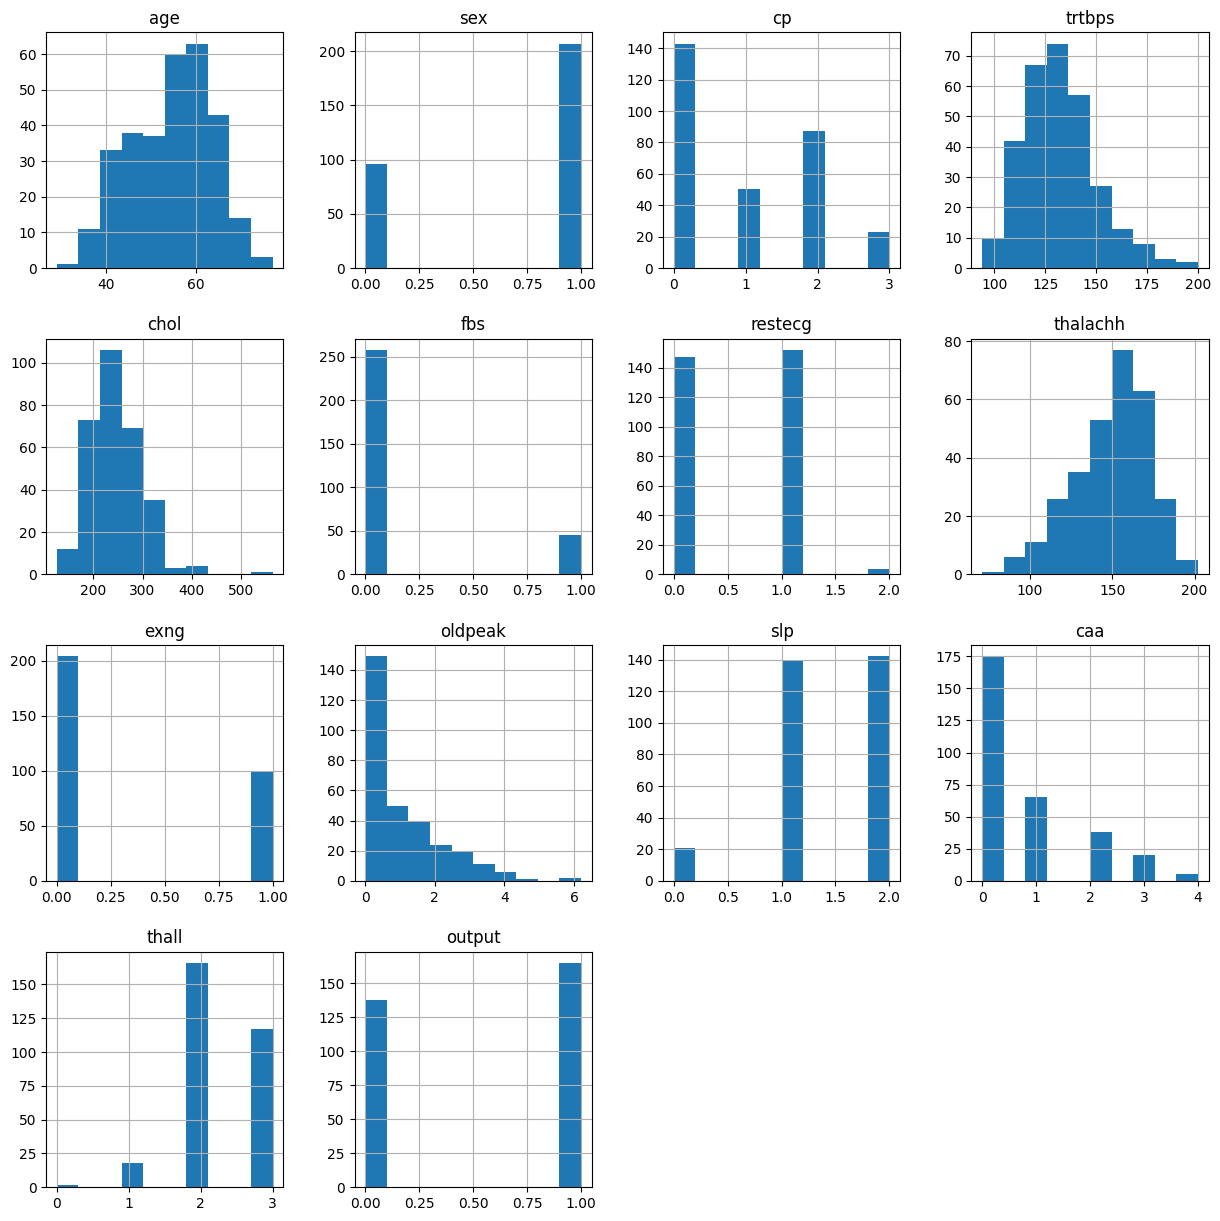

In [ ]:
df.hist(figsize=(15,15))
plt.show()

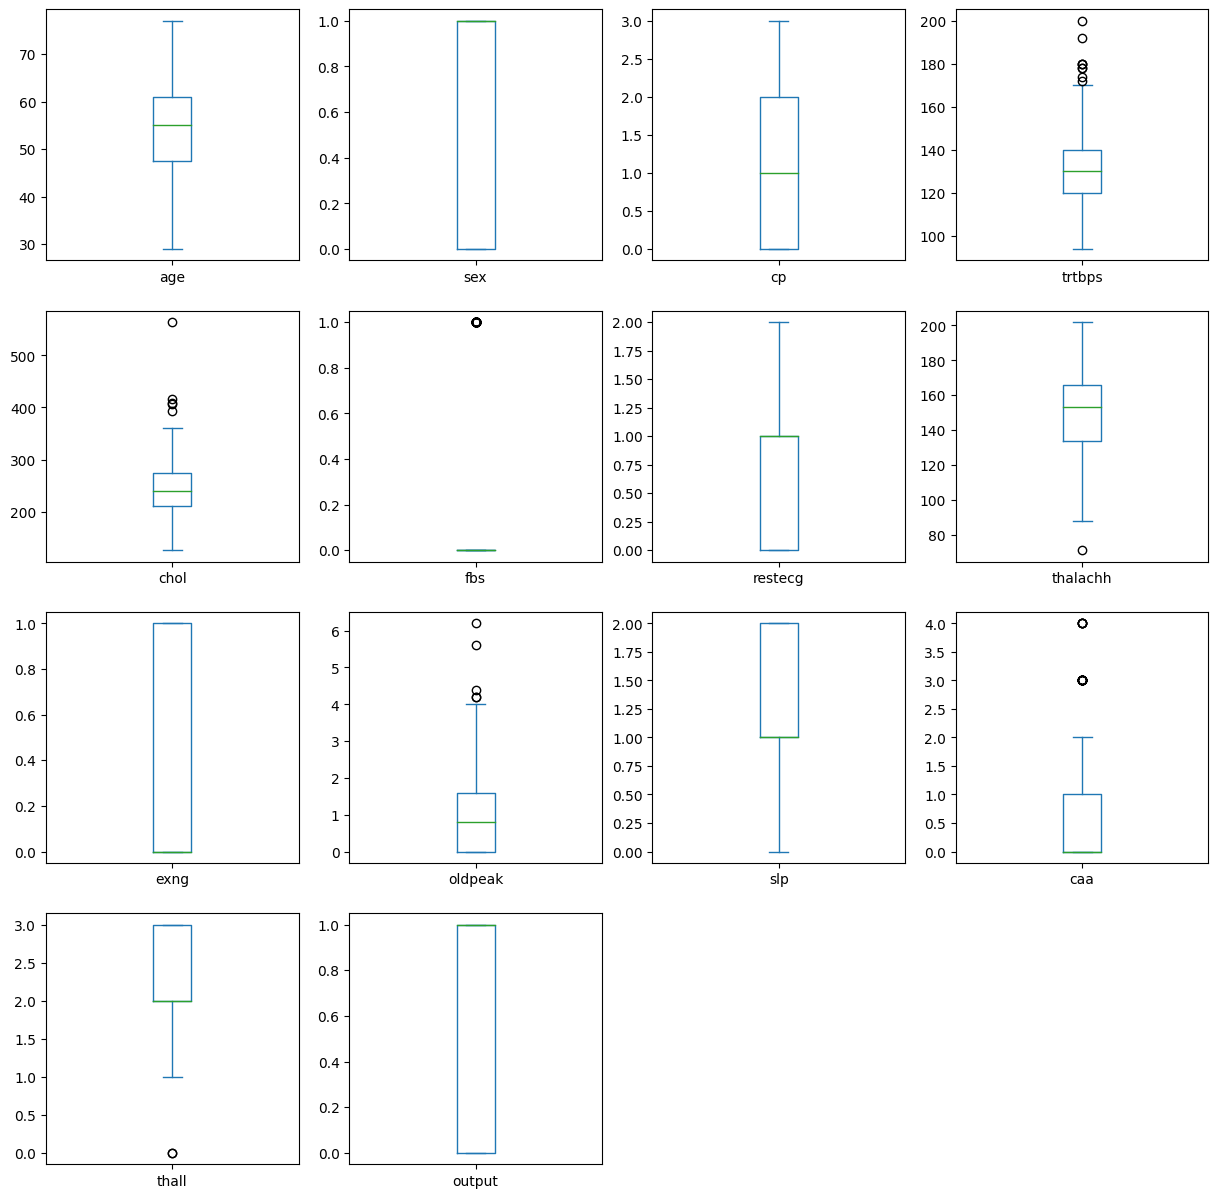

In [ ]:
df.plot(kind='box',subplots=True,layout=(4,4),figsize=(15,15))
plt.show()

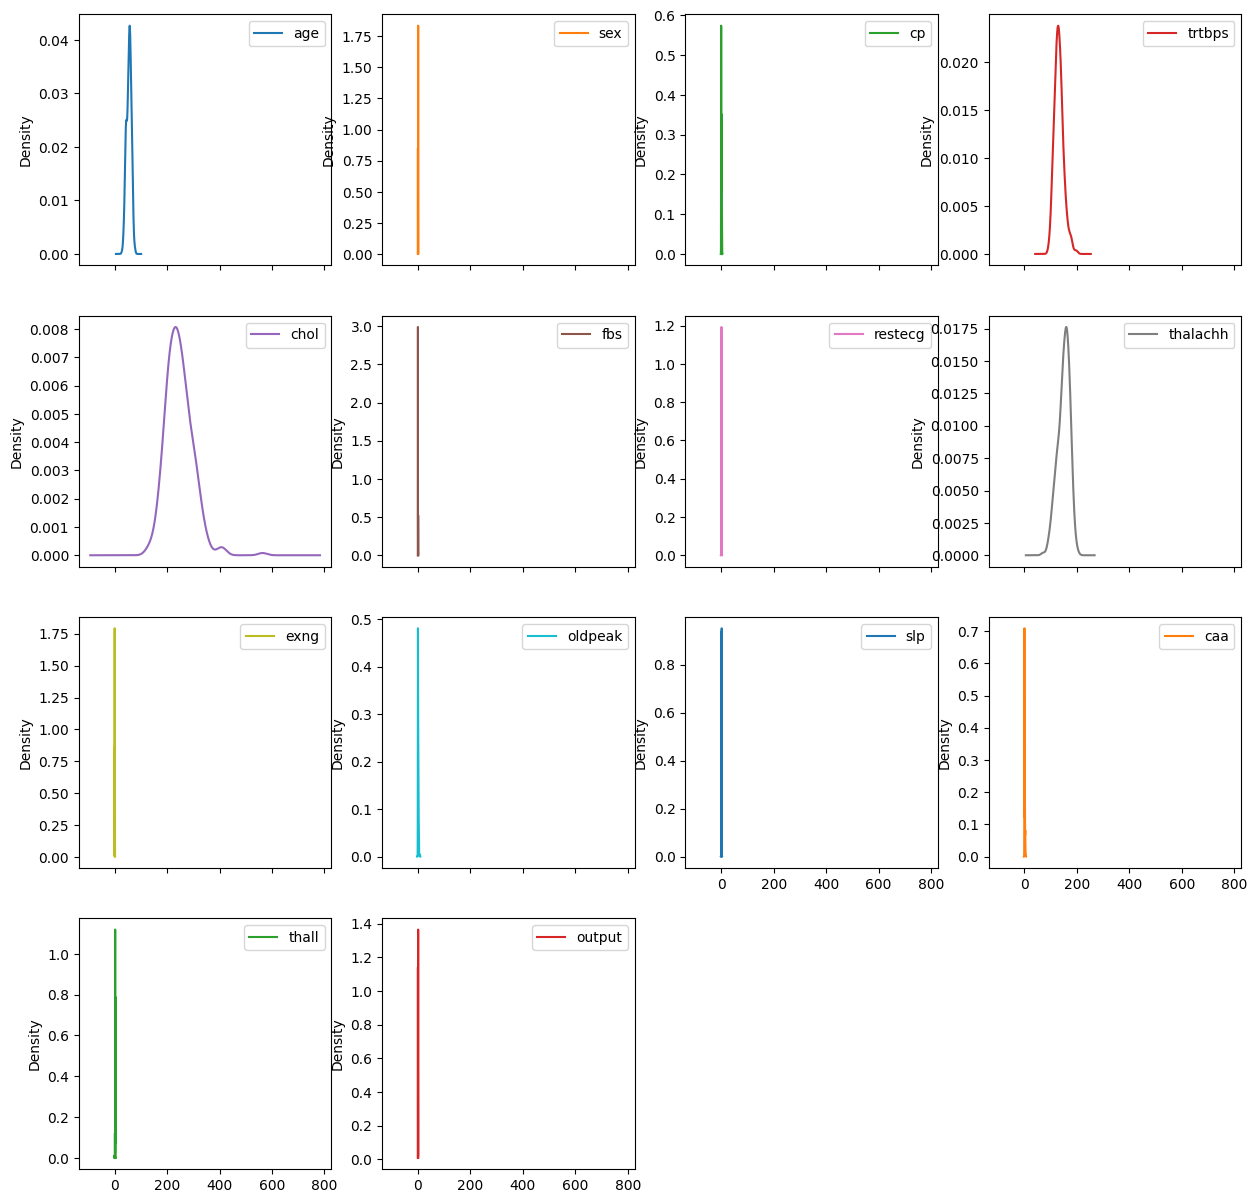

In [ ]:
df.plot(kind='density',subplots=True,layout=(4,4),figsize=(15,15))
plt.show()

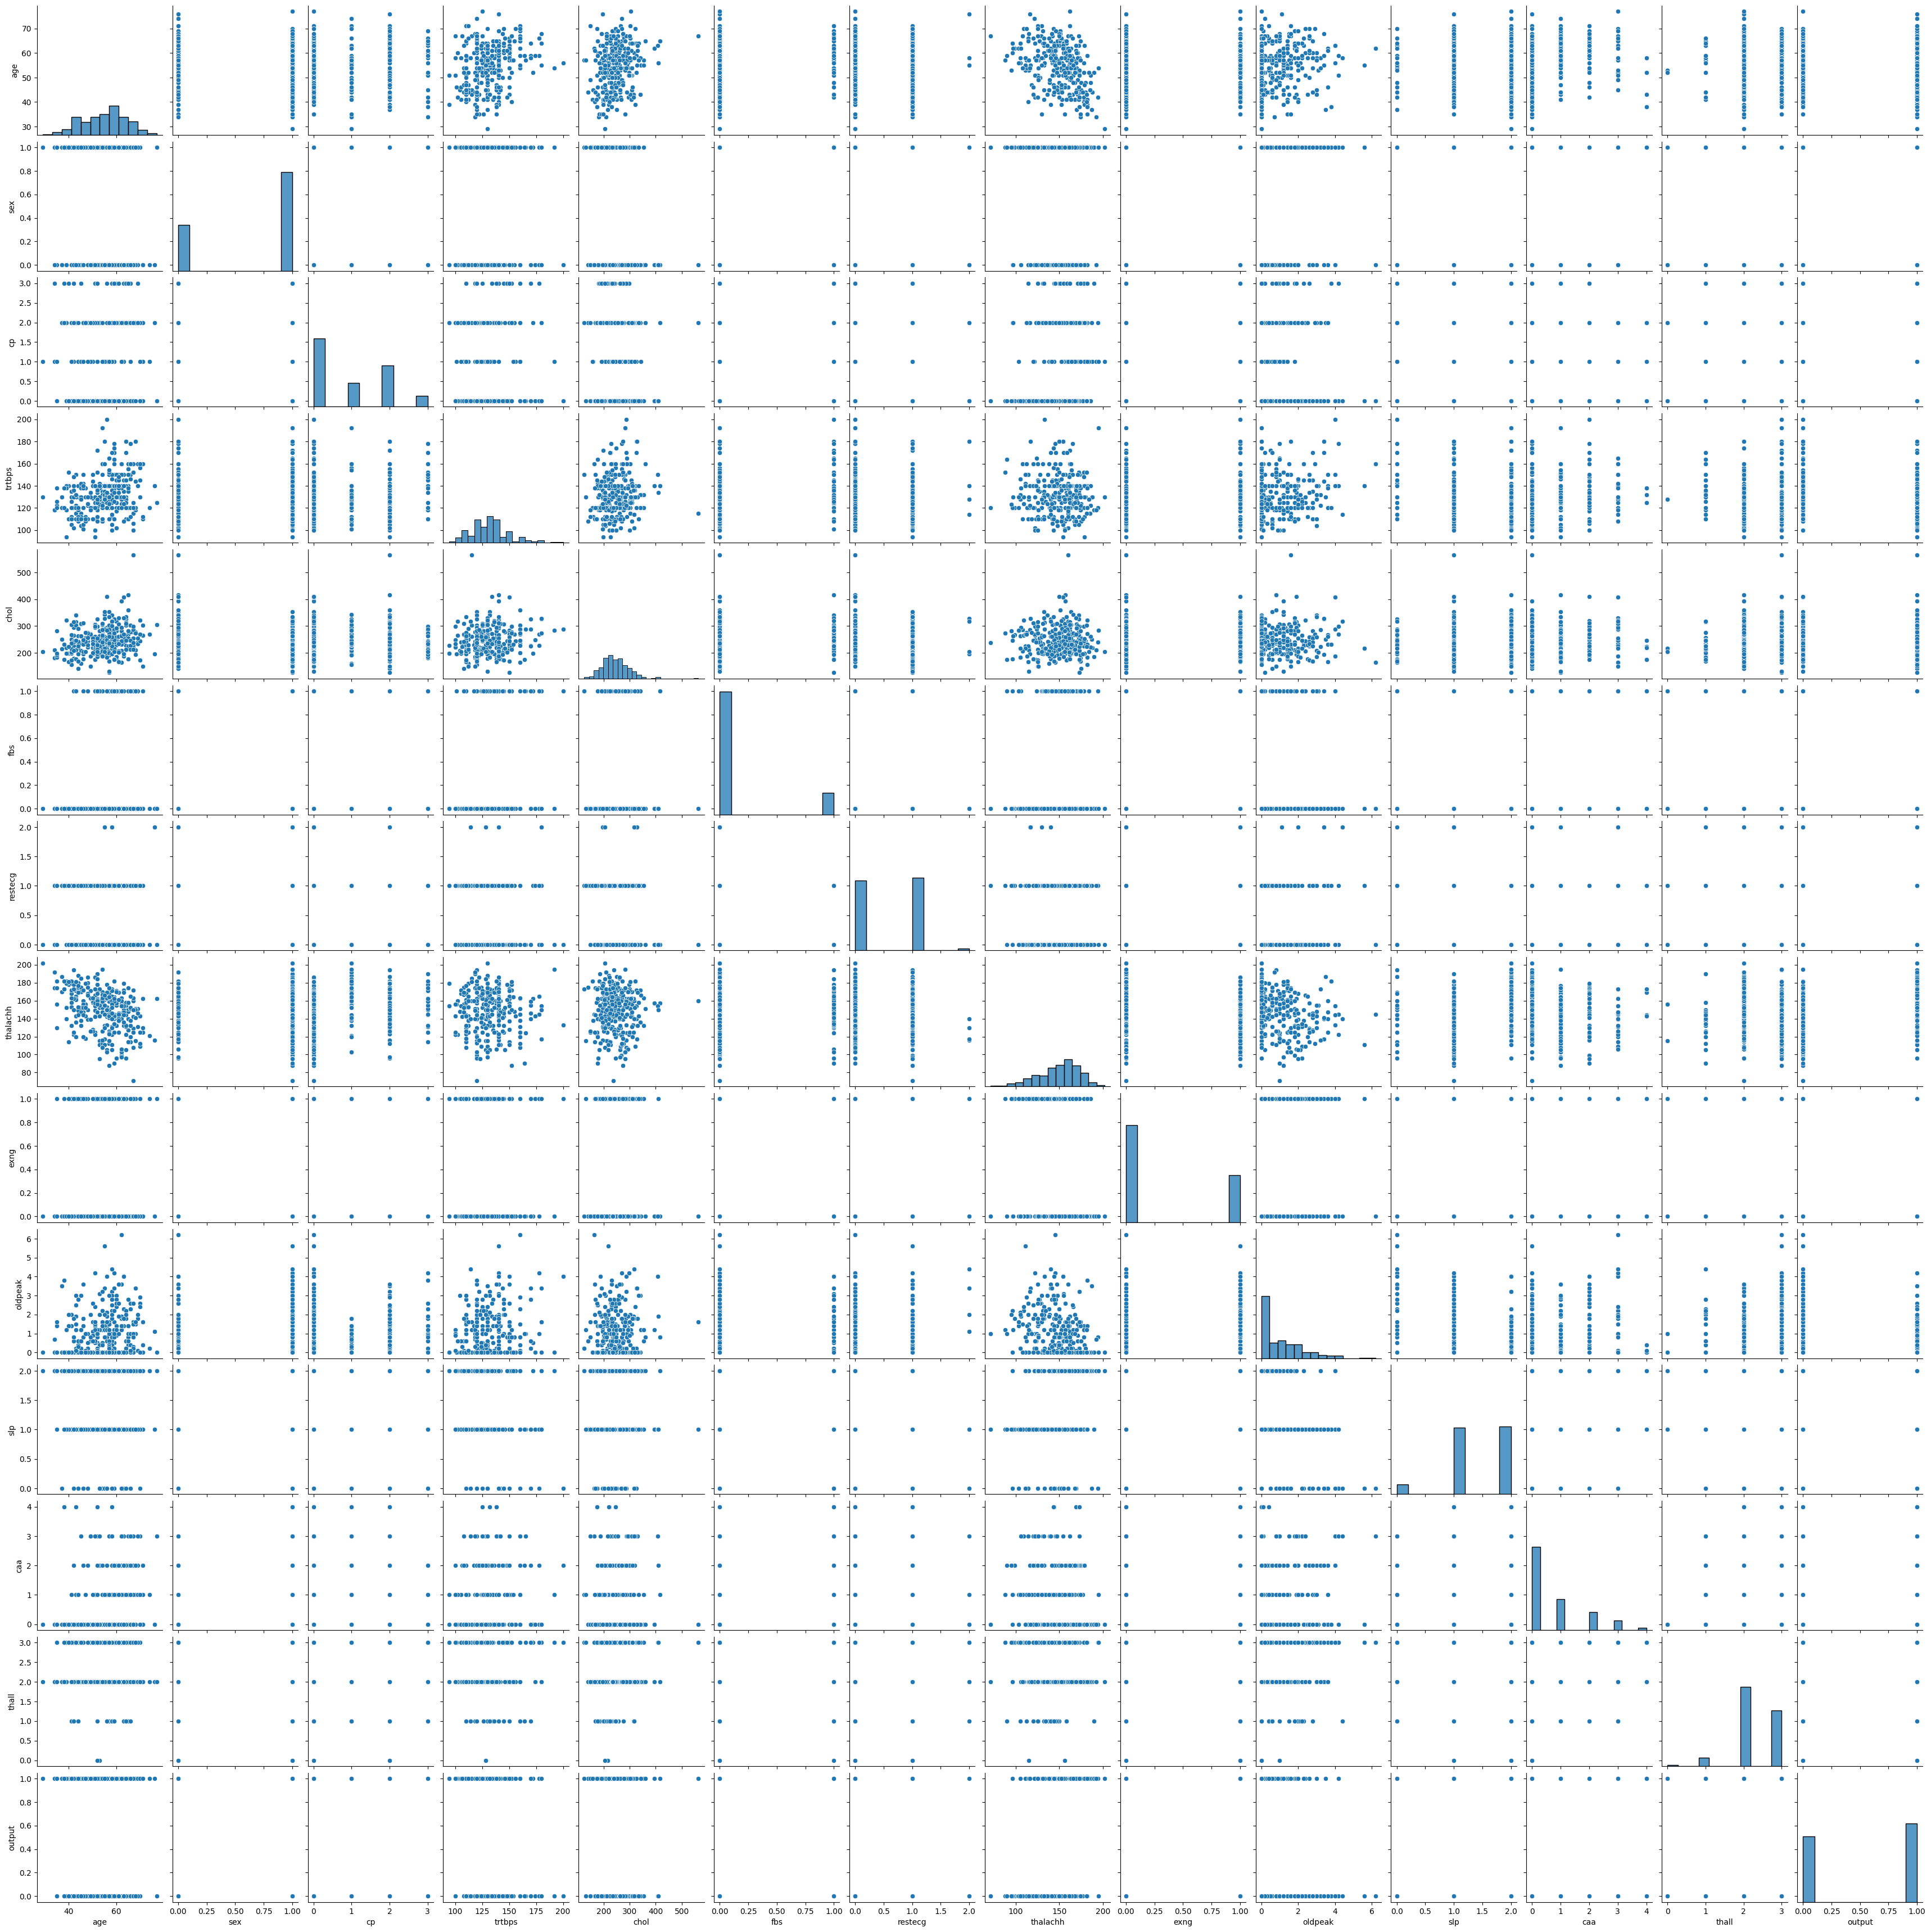

In [ ]:
sns.pairplot(df)
plt.show()

In [ ]:
corr=df.corr()
corr

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


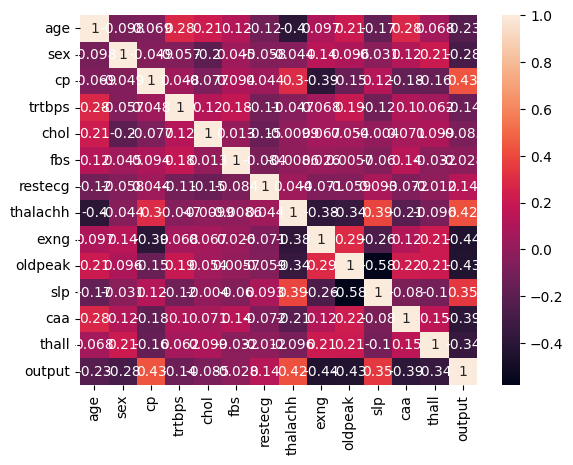

In [ ]:
sns.heatmap(corr,annot=True)
plt.show()

# Feature Engineering

In [ ]:
standardScaler=StandardScaler()
df_scaled=standardScaler.fit_transform(df)
df_scaled

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -0.71442887,
        -2.14887271,  0.91452919],
       [-1.91531289,  0.68100522,  1.00257707, ..., -0.71442887,
        -0.51292188,  0.91452919],
       [-1.47415758, -1.46841752,  0.03203122, ..., -0.71442887,
        -0.51292188,  0.91452919],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ...,  1.24459328,
         1.12302895, -1.09345881],
       [ 0.29046364,  0.68100522, -0.93851463, ...,  0.26508221,
         1.12302895, -1.09345881],
       [ 0.29046364, -1.46841752,  0.03203122, ...,  0.26508221,
        -0.51292188, -1.09345881]])

In [ ]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)
df_norm=norm_func(df.iloc[:,:])
df_norm

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.00,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.00,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.00,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.00,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.00,0.666667,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.000000,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.5,0.00,1.000000,0.0
299,0.333333,1.0,1.000000,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.5,0.00,1.000000,0.0
300,0.812500,1.0,0.000000,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.5,0.50,1.000000,0.0
301,0.583333,1.0,0.000000,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.5,0.25,1.000000,0.0


# Decision Tree Classification

In [ ]:
x=df.iloc[:,0:13]
y=df['output']
x

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
y

,output
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [ ]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [ ]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

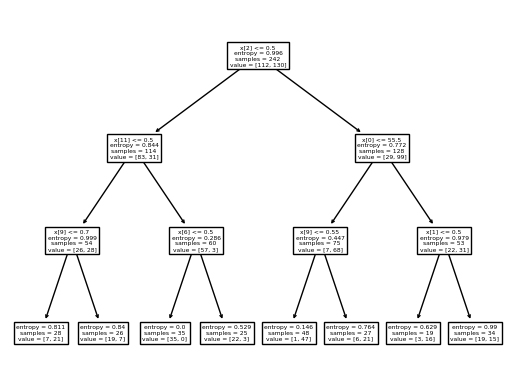

In [ ]:
#PLot the decision tree
tree.plot_tree(model);


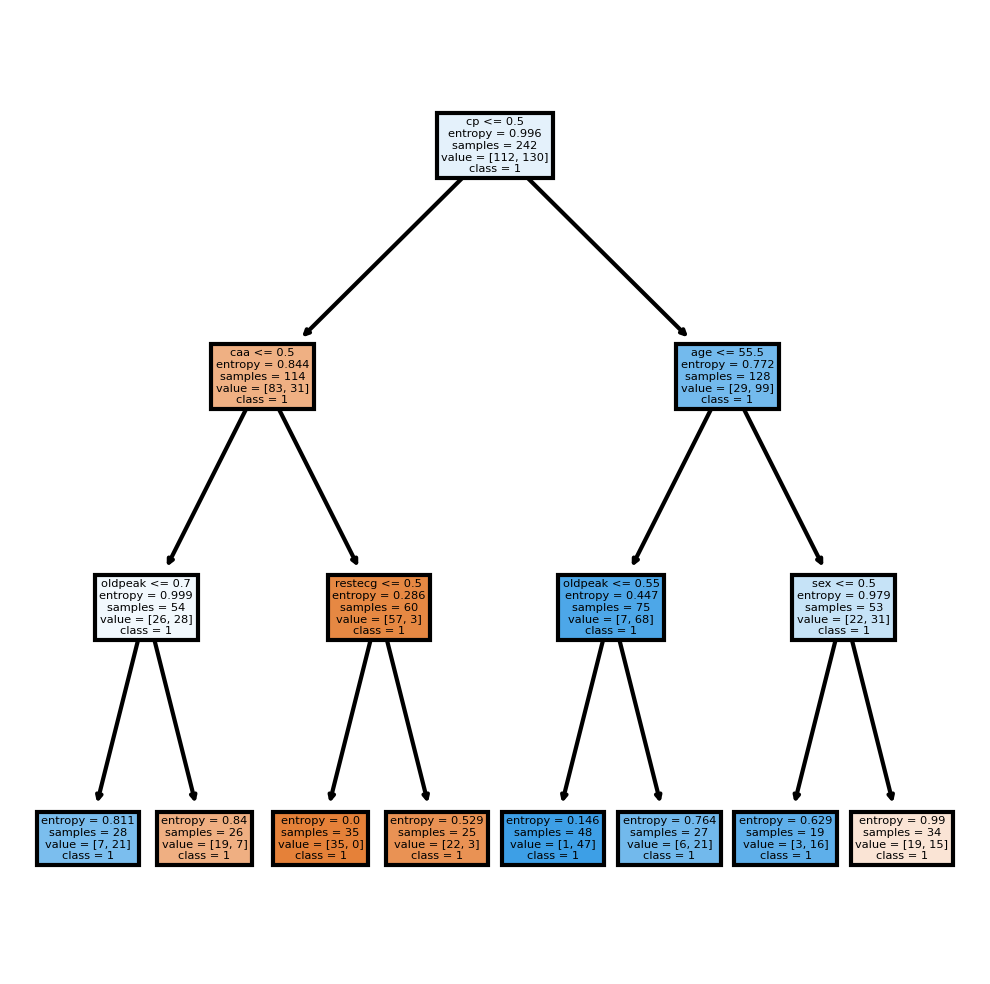

In [ ]:
fn = x.columns.tolist()  # Get the column names of x as a list
cn = y.astype(str)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=300)
tree.plot_tree(model, feature_names=fn, class_names=cn, filled=True); # Now cn contains strings
plt.show()


In [ ]:
text = tree.export_text(model,max_depth=3)
print(text)

|--- feature_2 <= 0.50
|   |--- feature_11 <= 0.50
|   |   |--- feature_9 <= 0.70
|   |   |   |--- class: 1
|   |   |--- feature_9 >  0.70
|   |   |   |--- class: 0
|   |--- feature_11 >  0.50
|   |   |--- feature_6 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_6 >  0.50
|   |   |   |--- class: 0
|--- feature_2 >  0.50
|   |--- feature_0 <= 55.50
|   |   |--- feature_9 <= 0.55
|   |   |   |--- class: 1
|   |   |--- feature_9 >  0.55
|   |   |   |--- class: 1
|   |--- feature_0 >  55.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_1 >  0.50
|   |   |   |--- class: 0



In [ ]:
model.feature_importances_

array([0.1214629 , 0.05707521, 0.41810378, 0.        , 0.        ,
       0.        , 0.03591616, 0.        , 0.        , 0.13910584,
       0.        , 0.22833611])

In [ ]:
import pandas as pd
feature_imp = pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False)
feature_imp

,0
cp,0.418104
caa,0.228336
oldpeak,0.139106
age,0.121463
sex,0.057075
restecg,0.035916
trtbps,0.000000
chol,0.000000
fbs,0.000000
thalachh,0.000000


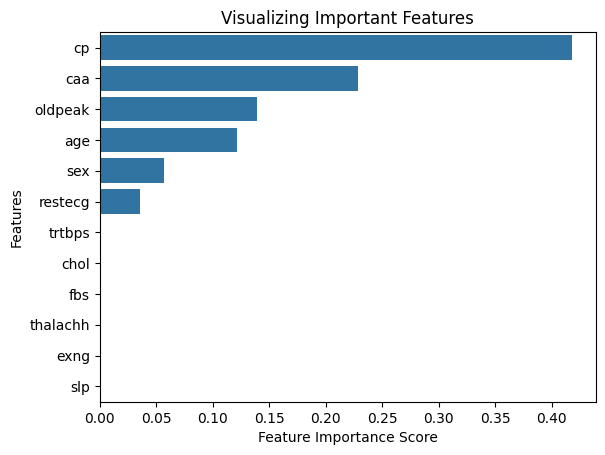

In [ ]:

%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [ ]:
preds = model.predict(x_test) # predicting on test data set
pd.Series(preds).value_counts() # getting the count of each category

,count
0,34
1,27


In [ ]:
preds

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1])

In [ ]:
pd.crosstab(y_test,preds)

col_0,0,1
output,,
0,23,3
1,11,24


In [ ]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Predict on the test set
y_pred = clf.predict(x_test)

In [ ]:
# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.81      0.72        26
           1       0.83      0.69      0.75        35

    accuracy                           0.74        61
   macro avg       0.74      0.75      0.74        61
weighted avg       0.75      0.74      0.74        61

[[21  5]
 [11 24]]
ROC-AUC Score: 0.7467032967032967


# Hyperparameter Tuning

In [ ]:
# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}


In [ ]:
# Initialize GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

In [ ]:
# Fit to the training data
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [ ]:
# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 5}
Best Score: 0.7442176870748299


#  Model Evaluation and Analysis

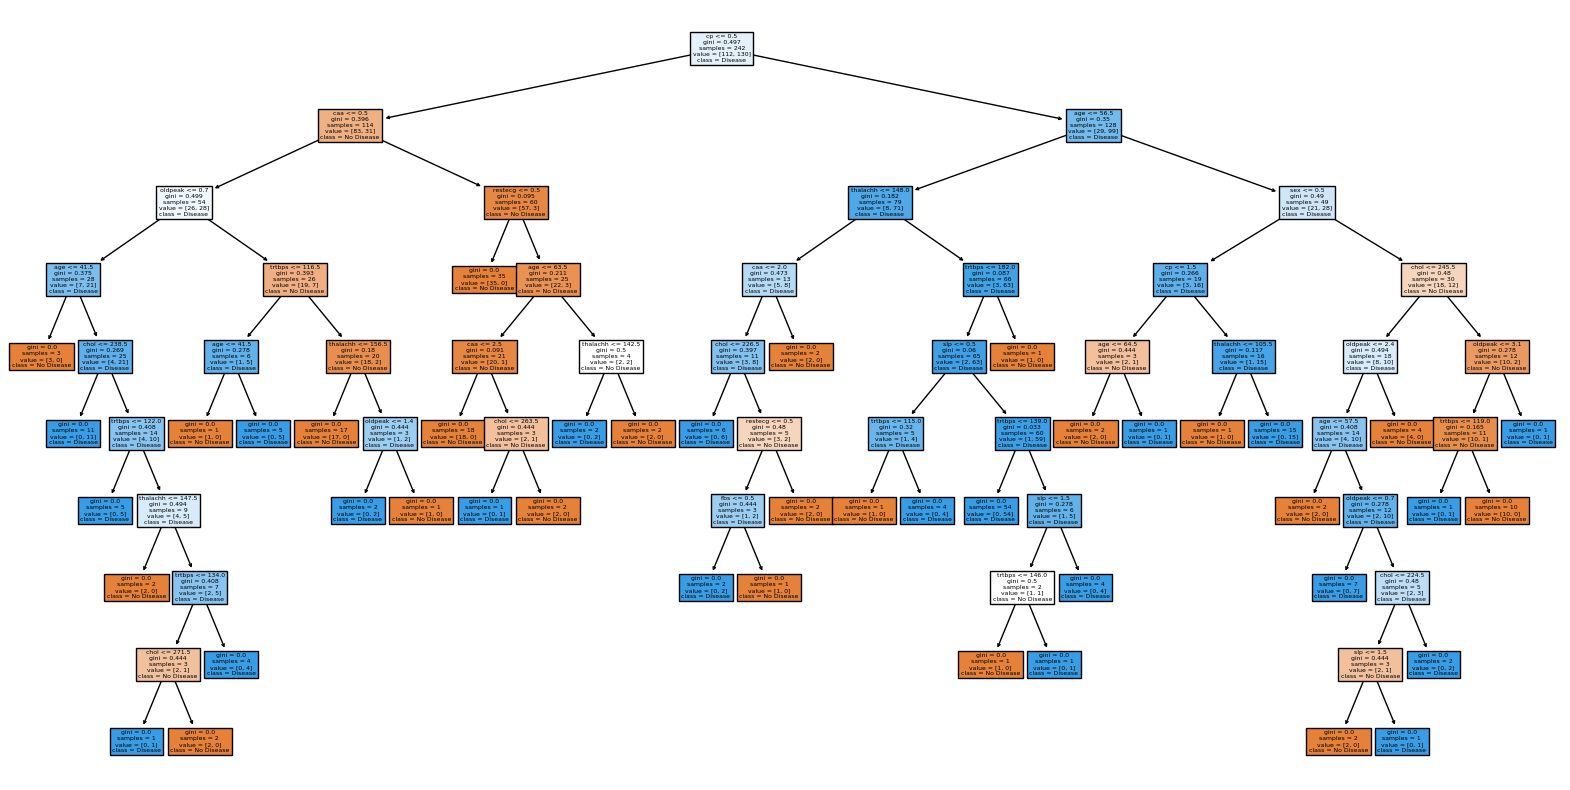

In [ ]:
# Visualize the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, feature_names=x.columns, class_names=['No Disease', 'Disease'])
plt.show()


# Interview Questions



---



**1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?**

*   max_depth: Limits the depth of the tree, preventing overfitting.
*   min_samples_split: The minimum number of samples required to split an internal node, controlling model complexity.
*   criterion: Function to measure the quality of a split (gini or entropy), influencing how splits are made.





**2. What is the difference between the Label encoding and One-hot encoding?**

*   Label Encoding: Converts categorical labels into integer codes, but can impose an unintended ordinal relationship.
*   One-Hot Encoding: Converts categorical variables into binary vectors, avoiding ordinal assumptions, but can increase the dimensionality significantly.

